# Day 72: Popularity of Different Programming Languages

[Stack Overflow](https://stackoverflow.com/) is an online community for developers to learn and share their programming knowledge. Posts can be tagged with a number of keywords, 14 of which are programming languages. We perform a SQL query to retrieve the number of posts between July 2008 and June 2023 and count the number of instances posts were tagged with any of the 14 languages.

Through the learning objectives, we determine which are the most and least popular programming languages as determined by frequency of posts on Stack Overflow.

Learning objectives:

- Visualize data and create charts with Matplotlib
- Pivot, group, and manipulate data with Pandas to get it into the desired format
- Work with timestamps and time-series data
- Style and customize a line chart 

# Import the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns
from IPython.display import display, clear_output

sns.set_theme(style="whitegrid")
sns.set_palette("muted")
plt.rcParams['font.family'] = 'arial'

# Import the data

To build an updated dataset, we run the [Popular programming languages per over time](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) query on StackExchange and download the CSV file. 

The default column headers "M", "Tag Name", and "" don't intuitively represent their contents so we also replace them with custom header names "DATE", "TAG", and "POSTS".

In [2]:
custom_headers = ["DATE", "TAG", "POSTS"]
df = pd.read_csv("QueryResults.csv", names=custom_headers, header=0)

# Inspect the data

In [3]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


In [4]:
df.tail()

,DATE,TAG,POSTS
2477,2023-06-01 00:00:00,php,1937
2478,2023-06-01 00:00:00,python,11455
2479,2023-06-01 00:00:00,r,2685
2480,2023-06-01 00:00:00,ruby,228
2481,2023-06-01 00:00:00,swift,1145


The dataset is in chronological order. Viewing the first five and last five entries shows the dataset spans a period between July 2008 and June 2023.

In [5]:
df.shape

(2482, 3)

There are 2,482 rows and three columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2482 entries, 0 to 2481
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    2482 non-null   object
 1   TAG     2482 non-null   object
 2   POSTS   2482 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 58.3+ KB


Each column has 2,482 entries since there are no missing (non-null) values. However, the date entries are of the `object` datatype rather than datetime. 

In [7]:
df.groupby("TAG")["POSTS"].sum().sort_values(ascending=False)

TAG
javascript    2497345
python        2140620
java          1898378
c#            1593993
php           1458288
c++            795050
r              492002
c              397097
swift          327818
ruby           228011
go              69577
perl            67686
delphi          51007
assembly        42904
Name: POSTS, dtype: int64

There are 14 programming languages with tags on Stack Overflow. Grouping the dataset by language and sorting the total number of posts in descending order, the top five languages with the most number of posts in order are: (1) Javascript, (2) Python, (3) Java, (4) C#, and (5) PHP. These five have over 1.4 million posts each between July 2008 and June 2023.

In [8]:
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
assembly,179,179
c,179,179
c#,180,180
c++,179,179
delphi,179,179
go,164,164
java,179,179
javascript,179,179
perl,179,179


The dataset has about 179 months of data for most of the languages, the highest being C# with 180 months and Go with 164 months. The number of entries for both "DATE" and "POSTS" being identical indicates no missing values.

# Clean the data

To properly read the timestamps, we convert and replace the data type for the "DATE" entries from `object` to `datetime`.

In [9]:
df["DATE"] = pd.to_datetime(df["DATE"])

In [10]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


Inspecting the first five entries, we see the format conversion is successful.

# Manipulate the data

Displaying the data in a pivot table format will allow us to interpret not only by date but also by programming language.

In [11]:
reshaped_df = df.pivot(index="DATE", columns="TAG", values="POSTS")

In [12]:
reshaped_df.shape

(180, 14)

The new dataframe has 180 entries (months) and 14 columns (languages).

In [13]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1641.0,754.0,104.0,NaN,1129.0,634.0,130.0,475.0,537.0,6.0,287.0,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1731.0,734.0,141.0,NaN,956.0,580.0,97.0,499.0,449.0,1.0,157.0,NaN


In [14]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2023-02-01,188.0,1309.0,4763.0,2219.0,133.0,659.0,5189.0,10449.0,79.0,2427.0,15717.0,3803.0,340.0,1296.0
2023-03-01,180.0,1265.0,4910.0,2572.0,143.0,639.0,5538.0,10541.0,95.0,2282.0,15565.0,3832.0,301.0,1367.0
2023-04-01,197.0,1190.0,3850.0,1967.0,121.0,516.0,4498.0,8317.0,56.0,1944.0,12447.0,3107.0,220.0,1098.0
2023-05-01,176.0,1051.0,3848.0,1785.0,115.0,427.0,4201.0,7810.0,54.0,1977.0,11835.0,2867.0,256.0,1003.0
2023-06-01,157.0,899.0,3867.0,1851.0,118.0,529.0,4379.0,7636.0,54.0,1937.0,11455.0,2685.0,228.0,1145.0


Entries with NaN values make sense as Go was not openly released until 2009 and Swift until 2014. Because it is clear that these NaN values indicate zero posts, we replace all such instances with numerical values.

In [15]:
reshaped_df.fillna(0, inplace=True)

In [16]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1641.0,754.0,104.0,0.0,1129.0,634.0,130.0,475.0,537.0,6.0,287.0,0.0
2008-10-01,16.0,302.0,1988.0,807.0,112.0,0.0,1149.0,722.0,128.0,610.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1731.0,734.0,141.0,0.0,956.0,580.0,97.0,499.0,449.0,1.0,157.0,0.0


All NaN values have effectively been converted to zero values. To confirm a full conversion has been made, we check using the following:

In [17]:
reshaped_df.isna().values.any()

False

With the dataset now fully cleaned, we can now analyze and visualize the data.

# Visualize the data

## Number of posts by programming language over time

In [18]:
def lineplot(language):
    plt.figure(figsize=(8, 5))
    plt.plot(df[df['TAG'] == language]['DATE'], df[df['TAG'] == language]['POSTS'], marker='o')
    plt.ylabel('Number of Posts')
    plt.title(f'Number of Posts for {language.title()}', fontsize=20)
    sns.despine(top=True, bottom=True, left=True, right=True)
    plt.grid(axis="y", alpha=0.3)
    plt.tick_params(axis="both", length=0)
    plt.tight_layout()
    plt.savefig(f"images/{language}.png")
    plt.show()

languages = sorted(df['TAG'].unique())

select_language_slider = widgets.Dropdown(
    options=languages,
    value=languages[0],
    description="Programming Language:",    
    style={'description_width': 'initial'},
    continuous_update = True
)

widgets.interact(lineplot, language=select_language_slider)

interactive(children=(Dropdown(description='Programming Language:', options=('assembly', 'c', 'c#', 'c++', 'de…

<function __main__.lineplot(language)>

>See the [images](images/) folder for all images if widget above fails to load.

We can now visibly see how the popularity has trended for each programming language over time. Python's popularity is shown below:

<img src="images/python.png" alt="popularity of Python on Stack Overflow over time">

## Number of posts for top 5 programming languages

Recall the top five programming languages based on total number of Stack Overflow posts:

In [19]:
tag_post_counts = df.groupby("TAG")["POSTS"].sum()
top_five = tag_post_counts.nlargest(5)
print(top_five)

TAG
javascript    2497345
python        2140620
java          1898378
c#            1593993
php           1458288
Name: POSTS, dtype: int64


We plot these to visualize their trends since 2008 through June 2023, the full period of the dataset.

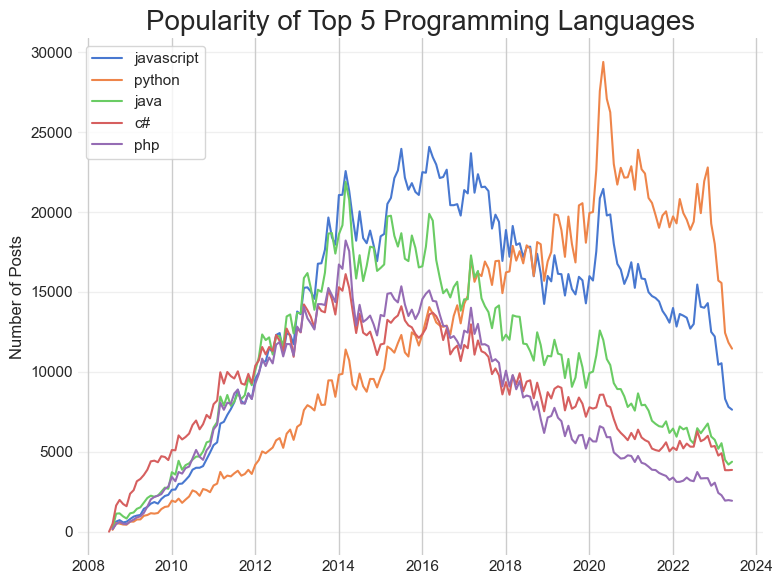

In [20]:
plt.figure(figsize=(8, 6))

for language in top_five.index.to_list():
    plt.plot(df[df['TAG'] == language]['DATE'], df[df['TAG'] == language]['POSTS'], label=language)

plt.ylabel('Number of Posts')
plt.title(f'Popularity of Top 5 Programming Languages', fontsize=20)
sns.despine(top=True, bottom=True, left=True, right=True)
plt.grid(axis="y", alpha=0.3)
plt.tick_params(axis="both", length=0)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

While Javascript remains #1 in total number of posts overall, their number of posts per year has come second to that of Python's since around mid-2018. Since the advent of chatbot systems in the early 2020s, Stack Overflow posts have decreased and appear to continue decreasing.

Considering recent activity only (within the past 5 years), the most popular language based on posts per year is Python.

## Popularity of All Programming Languages on Stack Overflow

To create a cleaner visualization for all 14 languages, we smooth out the observations by taking averages of the data points using two built-in Pandas methods: `rolling()` and `mean()`.

In [21]:
roll_df = reshaped_df.rolling(window=6).mean()

Because `matplotlib` cycles through a maximum of 10 colors before repeating them, we bucket the first half of the languages to apply a line style different than the latter half.

In [22]:
top_half = tag_post_counts.nlargest(int(len(languages)/2))

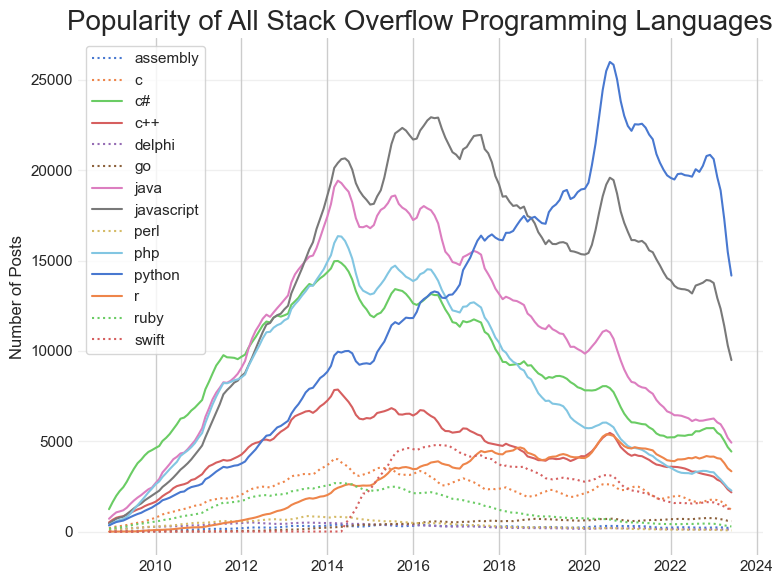

In [23]:
plt.figure(figsize=(8, 6))

for index, language in enumerate(roll_df.columns):
    if language in top_half.index.to_list():
        plt.plot(roll_df.index, roll_df[language], label=roll_df[language].name)
    else:
        plt.plot(roll_df.index, roll_df[language], label=roll_df[language].name, linestyle=":")
    
plt.ylabel('Number of Posts')
plt.title(f'Popularity of All Stack Overflow Programming Languages', fontsize=20)
sns.despine(top=True, bottom=True, left=True, right=True)
plt.grid(axis="y", alpha=0.3)
plt.tick_params(axis="both", length=0)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

The popularity of programming languages has changed over time, with C# as the most popular from 2008 to 2012, Javascript from 2014 to 2018, and now Python from 2019 to today. 

The least popular programming languages Assembly, Delphi, Perl, Go, and Ruby have consistently underperformed in the last 10 years.